In [7]:
import cv2 as cv
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
PATH_AND_LABEL = []

with open ("path_and_label", mode="r") as file :
    for line in file:
        line = line.rstrip()
        line_list = line.split()
        PATH_AND_LABEL.append(line_list)
        random.shuffle(PATH_AND_LABEL)

DATA_SET = []
n = 0
for path_label in PATH_AND_LABEL :
    tmp_list = []
    
    img = cv.imread(path_label[0])
    img = cv.resize(img,(28,28))
    
    img = img.flatten().astype(np.float32)/255.0
    
    tmp_list.append(img)
    
    classes_array = np.zeros(3, dtype = 'float64')
    if n >= 104:
     classes_array[int(path_label[0])] = 1
    else :
        classes_array[int(path_label[1])] = 1
    
    tmp_list.append(classes_array)
    DATA_SET.append(tmp_list)

TRAIN_DATA_SIZE = int(len(DATA_SET) * 0.8)
TRAIN_DATA_SET = DATA_SET[:TRAIN_DATA_SIZE]
TEST_DATA_SET = DATA_SET[TRAIN_DATA_SIZE:]

In [8]:
CHANNELS = 3
NUM_CLASSES = 3
IMAGE_SIZE = 28
IMAGE_MATRIX_SIZE = IMAGE_SIZE * IMAGE_SIZE * CHANNELS
PATH_LABEL_FILE = "path_and_label"

def batch_data(data_set, batch_size) :

    data_set = random.sample(data_set, batch_size)

    return data_set
def devide_data_set(data_set) :
    # ndarrayにすることで、以下のように配列にアクセスすることができる。
    data_set = np.array(data_set)
    image_data_set = data_set[:int(len(data_set)), :1].flatten()
    label_data_set = data_set[:int(len(data_set)), 1:].flatten()

    image_ndarray = np.empty((0, 2352))
    label_ndarray = np.empty((0, 3))

    for (img, label) in zip(image_data_set, label_data_set) :
        image_ndarray = np.append(image_ndarray, np.reshape(img, (1, 2352)), axis=0)
        label_ndarray = np.append(label_ndarray, np.reshape(label, (1, 32)), axis=0)

    return image_ndarray, label_ndarray
def batch_data(data_set, batch_size) :

    data_set = random.sample(data_set, batch_size)

    return data_set


def devide_data_set(data_set) :
    data_set = np.array(data_set)
    image_data_set = data_set[:int(len(data_set)), :1].flatten()
    label_data_set = data_set[:int(len(data_set)), 1:].flatten()

    image_ndarray = np.empty((0, IMAGE_MATRIX_SIZE))
    label_ndarray = np.empty((0, NUM_CLASSES))

    for (img, label) in zip(image_data_set, label_data_set) :
        image_ndarray = np.append(image_ndarray, np.reshape(img, (1, IMAGE_MATRIX_SIZE)), axis=0)
        label_ndarray = np.append(label_ndarray, np.reshape(label, (1, NUM_CLASSES)), axis=0)

    return image_ndarray, label_ndarray


def conv2d(x, W) :
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x) :
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
def weight_variable(shape) :
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape) :
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def deepnn(x) :

    with tf.name_scope('reshape') :
        x_image = tf.reshape(x, [-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS])

    with tf.name_scope('conv1') :
        W_conv1 = weight_variable([5, 5, CHANNELS, 32])
        b_conv1 = bias_variable([32])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('pool1') :
        h_pool1 = max_pool_2x2(h_conv1)

    with tf.name_scope('conv2') :
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    with tf.name_scope('pool2') :
        h_pool2 = max_pool_2x2(h_conv2)
    with tf.name_scope('fc1') :
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])

        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    with tf.name_scope('dropout') :
        keep_prob = tf.placeholder(tf.float32)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    with tf.name_scope('fc2') :
        W_fc2 = weight_variable([1024, NUM_CLASSES])
        b_fc2 = bias_variable([NUM_CLASSES])

        y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    return y_conv, keep_prob

In [13]:
def devide_data_set(data_set) :
    # ndarrayにすることで、以下のように配列にアクセスすることができる。
    data_set = np.array(data_set)
    image_data_set = data_set[:int(len(data_set)), :1].flatten()
    label_data_set = data_set[:int(len(data_set)), 1:].flatten()

    image_ndarray = np.empty((0, 2352))
    label_ndarray = np.empty((0, 3))

    for (img, label) in zip(image_data_set, label_data_set) :
        image_ndarray = np.append(image_ndarray, np.reshape(img, (1, 2352)), axis=0)
        label_ndarray = np.append(label_ndarray, np.reshape(label, (1, 3)), axis=0)

    return image_ndarray, label_ndarray
def batch_data(data_set, batch_size) :

    data_set = random.sample(data_set, batch_size)

    return data_set


def devide_data_set(data_set) :
    data_set = np.array(data_set)
    image_data_set = data_set[:int(len(data_set)), :1].flatten()
    label_data_set = data_set[:int(len(data_set)), 1:].flatten()

    image_ndarray = np.empty((0, IMAGE_MATRIX_SIZE))
    label_ndarray = np.empty((0, NUM_CLASSES))

    for (img, label) in zip(image_data_set, label_data_set) :
        image_ndarray = np.append(image_ndarray, np.reshape(img, (1, IMAGE_MATRIX_SIZE)), axis=0)
        label_ndarray = np.append(label_ndarray, np.reshape(label, (1, NUM_CLASSES)), axis=0)

    return image_ndarray, label_ndarray


def conv2d(x, W) :
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x) :
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
def weight_variable(shape) :
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape) :
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def deepnn(x) :

    with tf.name_scope('reshape') :
        x_image = tf.reshape(x, [-1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS])

    with tf.name_scope('conv1') :
        W_conv1 = weight_variable([5, 5, CHANNELS, 32])
        b_conv1 = bias_variable([32])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('pool1') :
        h_pool1 = max_pool_2x2(h_conv1)

    with tf.name_scope('conv2') :
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    with tf.name_scope('pool2') :
        h_pool2 = max_pool_2x2(h_conv2)
    with tf.name_scope('fc1') :
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])

        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    with tf.name_scope('dropout') :
        keep_prob = tf.placeholder(tf.float32)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    with tf.name_scope('fc2') :
        W_fc2 = weight_variable([1024, NUM_CLASSES])
        b_fc2 = bias_variable([NUM_CLASSES])

        y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    return y_conv, keep_prob
class process:
    
    def main(_):

        x = tf.placeholder(tf.float32, [None, IMAGE_MATRIX_SIZE])

        y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES])

        y_conv, keep_prob = deepnn(x)

        with tf.name_scope('loss'):
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y_conv)
        cross_entropy = tf.reduce_mean(cross_entropy)

        with tf.name_scope('adam_optimizer'):
            train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

        with tf.name_scope('accuracy'):
            correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
            correct_prediction = tf.cast(correct_prediction, tf.float32)
        accuracy = tf.reduce_mean(correct_prediction)

        with tf.Session() as sess :
            sess.run(tf.global_variables_initializer())
            for epoch_step in range(MAX_EPOCH) :
                train_data_set = batch_data(TRAIN_DATA_SET, BATCH_SIZE)
                train_image, train_label = devide_data_set(train_data_set)

                if epoch_step % BATCH_SIZE == 0 :
                    train_accuracy = accuracy.eval(feed_dict={x: train_image, y_: train_label, keep_prob: 1.0})
                    print('epoch_step %d, training accuracy %g' % (epoch_step, train_accuracy))

                train_step.run(feed_dict={x: train_image, y_: train_label, keep_prob: 0.5})
            test_image, test_label = devide_data_set(TEST_DATA_SET)
            print('test accuracy %g' % accuracy.eval(feed_dict={
                x: test_image, y_: test_label, keep_prob: 1.0}))
#     import math
    
#     x = tf.placeholder(tf.float32, [None, IMAGE_MATRIX_SIZE])
#     w0 = tf.Variable(tf.zeros([3]))
#     w = tf.Variable(tf.zeros([IMAGE_MATRIX_SIZE, 3]))
#     f = tf.matmul(x, w) + w0
#     p = tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y_conv)
#     t = tf.placeholder(tf.float32, [None, 3])

#     sess = tf.Session()
#     for epoch_step in range(MAX_EPOCH) :
#         train_data_set = batch_data(TRAIN_DATA_SET, BATCH_SIZE)
#         train_image, train_label = devide_data_set(train_data_set)
#     sess.run(tf.global_variables_initializer())

#     p_val = sess.run(p, feed_dict={x:train_image, t:train_label})
#     fig = plt.figure(figsize = (8,15))
    
#     i=0
#     for i in range(10):
#         c = 1
#         for (image, label, pred) in zip(train_image, train_label, p_val):
#             prediction, actual = np.argmax(pred), np.argmax(label)
#             if prediction != i:
#                 continue
#             if (c < 16  and i == actual) or (c >= 4 and i != actual):
#                 subplot = fig.add_subplot(10,6,i*6+c)
#                 subplot.set_xticks([])
#                 subplot.set_yticks([])
#                 subplot.set_title('%d/%d' % (prediction,actual))
#                 subplot.imshow(image.reshape(28,28,3), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
#                 c += 1
#             if c > 24:
#                 break

MAX_EPOCH = 100
BATCH_SIZE = 50

process.main(_)
# epoch_step ~, training accuracy ~
# test accuracy ~

epoch_step 0, training accuracy 0.66
epoch_step 50, training accuracy 1
test accuracy 0.956522


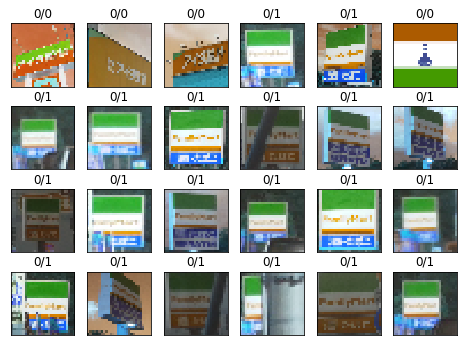

In [14]:
import math
    
x = tf.placeholder(tf.float32, [None, IMAGE_MATRIX_SIZE])
w0 = tf.Variable(tf.zeros([3]))
w = tf.Variable(tf.zeros([IMAGE_MATRIX_SIZE, 3]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)  
t = tf.placeholder(tf.float32, [None, 3])

sess = tf.Session()
# for epoch_step in range(MAX_EPOCH) :
#     train_data_set = batch_data(TRAIN_DATA_SET, BATCH_SIZE)
#     train_image, train_label = devide_data_set(train_data_set)
# sess.run(tf.global_variables_initializer())

p_val = sess.run(p, feed_dict={x:train_image, t:train_label})
fig = plt.figure(figsize = (8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(train_image, train_label, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 16  and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d/%d' % (prediction,actual))
            subplot.imshow(image.reshape(28,28,3), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
        if c > 24:
            break

In [ ]:
print (pred)